# <span style="color:blue">How to make targeted offers to customers?</span>
## <span style="color:blue">Marketing Campaign Optimization</span>

This notebook is part of the [Prescriptive Analytics for Python](https://rawgit.com/IBMDecisionOptimization/docplex-doc/master/docs/index.html)

### <span style="color:blue">Describe the business problem</span>
* This example is based on a fictional banking company. 
* The marketing department wants to achieve more profitable results in future campaigns by matching the right offer of financial services to each customer. 


* **The data science team needs to compute this best plan: it first predicted the current customer behavior with SPSS and stored the data in a CSV.**
* **Now they need to apply optimization on this dataset to determine the next best action.**


* The Self-Learning Response Model (SLRM) node from SPSS Modeler enables you to build a model that you can continually update. Such updates are useful in building a model that assists with predicting which offers are most appropriate for customers and the probability of the offers being accepted. These sorts of models are most beneficial in customer relationship management, such as marketing applications or call centers.
* Specifically, the example uses a Self-Learning Response Model to identify the characteristics of customers who are most likely to respond favorably based on previous offers and responses and to promote the best current offer based on the results.
<br>

A set of business constraints have to be respected:

* We have a limited budget to run a marketing campaign based on "gifts", "newsletter", "seminar"...
   * Each has a cost and an impact (weight) 
* We want to determine which is the unique best way to contact the customers.
* We need to identify which customers to contact.

***

## <span style="color:blue">Why are Prescriptive Analytics useful?</span>
### <span style="color:blue">Solving a very simple Marketing Campaign</span>

* For each possible <b>campaign</b>, a <b>cost</b> C and an <b>expected return</b> R are provided
* We have a <b>limited budget</b> to spend efficiently.

<table align=left>
<tr>
<td>
<table>
<tr><th>Revenue</th><th> Cost </th></tr>
<tr><td> 39 </td><td> 20 </td></tr>
<tr><td> 20 </td><td> 11 </td></tr>
<tr><td> 22 </td><td> 12 </td></tr>
<tr><td> 26 </td><td> 14 </td></tr>
</table>
</td>
<td>                    </td>
<td>
<table>
<tr><th> Revenue </th><th> Cost </th></tr>
<tr><td> 36 </td><td> 20 </td></tr>
<tr><td> 30 </td><td> 16 </td></tr>
<tr><td> 17 </td><td> 9 </td></tr>
<tr><td> 34 </td><td> 19 </td></tr>
</table>
</td>
 </tr>
<tr><h6> How do you spend your $100? </h6></tr>
</table>




#### Trying a custom algorithm
* What about the following rule (heuristic):
   * Sort campaigns according to decreasing return to cost ratio R / C to have the "best" ROI at first.
   * Choose campaigns in this order until the $100k budget is exhausted


<table align=left>
<tr><th>Revenue</th><th> Cost </th><th> Ratio </th></tr>
<tr><td> <b>39</b> </td><td> <b>20</b> </td><td> <b>1.95</b> </td></tr>
<tr><td> <b>17</b> </td><td> <b>9</b> </td><td> <b>1.89</b> </td></tr>
<tr><td> <b>30</b> </td><td> <b>16</b> </td><td> <b>1.88</b> </td></tr>
<tr><td> <b>26</b> </td><td> <b>14</b> </td><td> <b>1.86</b> </td></tr>
<tr><td> <b>22</b> </td><td> <b>12</b> </td><td> <b>1.83</b> </td></tr>
<tr><td> <b>20</b> </td><td> <b>11</b> </td><td> <b>1.82</b> </td></tr>
<tr><td> 36 </td><td> 20 </td><td> 1.80 </td></tr>
<tr><td> 34 </td><td> 19 </td><td> 1.19 </td></tr>
</table>

* You will end up selecting the bold columns, with a revenue of 154 for a cost of 82.
* <b>Your profit is \$72 </b>

#### Using prescriptive analytics
* Using CPLEX algorithm, you will be able to express your business constraints as mathematical sentences, then CPLEX will compute the values of decision variables (should I select an item or not?) mapped to the data.
* Asking for the maximum ROI, you will get a different <b>optimal</b> solution
* You could write a custom algorithm to the combinations (handle holes)… and search for the best solution but these are usually not trivial, time-consuming to implement whereas solving your problem with CPLEX Optimizer, you benefit from already implemented search algorithm that have been proven very efficient.

<table align=left>
<tr><th>Revenue</th><th> Cost </th><th> Ratio </th></tr>
<tr><td> <b>39</b> </td><td> <b>20</b> </td><td> <b>1.95</b> </td></tr>
<tr><td> 17 </td><td> 9 </td><td> 1.89 </td></tr>
<tr><td> <b>30</b> </td><td> <b>16</b> </td><td> <b>1.88</b> </td></tr>
<tr><td> <b>26</b> </td><td> <b>14</b> </td><td> <b>1.86</b> </td></tr>
<tr><td> 22 </td><td> 12 </td><td> 1.83 </td></tr>
<tr><td> <b>20</b> </td><td> <b>11</b> </td><td> <b>1.82</b> </td></tr>
<tr><td> <b>36</b> </td><td> <b>20</b> </td><td> <b>1.80</b> </td></tr>
<tr><td> <b>34</b> </td><td> <b>19</b> </td><td> <b>1.79</b> </td></tr>
</table>

* You will end up selecting the bold columns, with a revenue of 185 for a cost of 100.

* <b> Your profit is \$85  (\$13 more than previously) </b>

### <span style="color:blue">Conclusion</span>
* This kind of problem is highly combinatorial, that is it cannot be solved by hand or with a simple custom algorithm.
* In general, a SPSS-like algorithm will give you a full list of actions with their advantages and drawbacks. But in real life, you cannot put them all into action, because of limited budget, time...

* Prescriptive analytics is the next step on the path to insight-based actions. It creates value through <b>synergy with predictive analytics</b>, which analyzes data to predict future outcomes.
* Prescriptive analytics takes that insight to the next level by <b>suggesting the optimal way to handle that future situation</b>.

* One of the most powerful aspects of mathematical optimization is that <b>you don't need to know how to solve a problem to get a solution, the engine will provide it to you</b>
* <b>You “just” need to express the problem using a non-ambiguous mathematical language</b> (i.e. you need to write a mathematical model)


***

## <span style="color:blue">Back to the business problem: let's solve it!</span>
## <span style="color:blue">Prepare the data</span>
### <span style="color:blue">Step 1 : Model the data</span>

The predictions show which offers a customer is most likely to accept, and the confidence that they will accept, depending on each customer’s details.

For example:
* (139987, "Pension", 0.13221, "Mortgage", 0.10675) indicates that customer Id=139987 will certainly not buy a _Pension_ as the level is only 13.2%, 
* (140030, "Savings", 0.95678, "Pension", 0.84446) is more than likely to buy _Savings_ and a _Pension_ as the rates are 95.7% and 84.4%.

This data is taken from a SPSS example, except that the names of the customers were modified.

It was uploaded as CSV files on DSX.

#### Data is coming from a statistic tool. Here we use csv files that are supposedly produced by SPSS for example.

In [1]:
import pandas as pd
#channels = read_storage('channels.csv')
_names = pd.read_csv("https://raw.githubusercontent.com/vberaudi/utwt/master/bank_customers.csv", names =["customerid","name"])
offers = pd.read_csv("https://raw.githubusercontent.com/vberaudi/utwt/master/bank_behaviors.csv", names =["customerid","Product1","Confidence1","Product2","Confidence2"])

In [2]:
names = { t[0] : t[1] for t in _names.itertuples(index=False)}

Data for the marketing campaign.

In [3]:
from IPython.core.display import HTML
from IPython.display import display

In [4]:
products = ["Car loan", "Savings", "Mortgage", "Pension"]
productValue = [100, 200, 300, 400]
budgetShare = [0.6, 0.1, 0.2, 0.1]

availableBudget = 500
channels =  pd.DataFrame(data=[("gift", 20.0, 0.20), ("newsletter", 15.0, 0.05), ("seminar", 23.0, 0.30)], columns=["name", "cost", "factor"])

In [5]:
display(channels)
print("Budget is %d $" %availableBudget)

,name,cost,factor
0,gift,20,0.20
1,newsletter,15,0.05
2,seminar,23,0.30


Budget is 500 $


In [6]:
offers.insert(0,'name',pd.Series(names[i[0]] for i in offers.itertuples(index=False)))

In [7]:
import sys
sys.path.append("/gpfs/fs01/user/s683-f3dde465f37390-d7318baf8c6d/notebook/work/lib/python2.7/site-packages")

### The data

#### Highest expectations per customer

In [9]:
offers.drop('customerid',1).sort(columns = ['Confidence1', 'Confidence2'], ascending=False).head()

/usr/local/src/bluemix_jupyter_bundle.v36/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,name,Product1,Confidence1,Product2,Confidence2
14,Will Henderson,Savings,0.95678,Pension,0.86779
1,Michelle M. Lopez,Savings,0.95678,Pension,0.84446
24,Earl B. Wood,Savings,0.95678,Pension,0.83426
2,Terry L. Ridgley,Savings,0.95678,Pension,0.80233
25,Gabrielly Sousa Martins,Savings,0.95678,Pension,0.75925


#### Lowest expectations

In [10]:
offers.drop('customerid',1).sort(columns = ['Confidence1', 'Confidence2'], ascending=True).head()

/usr/local/src/bluemix_jupyter_bundle.v36/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,name,Product1,Confidence1,Product2,Confidence2
0,Guadalupe J. Martinez,Pension,0.13221,Mortgage,0.10675
3,Miranda B. Roush,Pension,0.13221,Mortgage,0.10675
5,Roland Guérette,Pension,0.13221,Mortgage,0.10675
6,Fabien Mailhot,Pension,0.13221,Mortgage,0.10675
7,Christian Austerlitz,Pension,0.13221,Mortgage,0.10675


## <span style="color:blue">Use IBM Decision Optimization CPLEX Modeling for Python</span>

Let's create the optimization model to select the best ways to contact customers and stay within the limited budget.

### <span style="color:blue">Step 1: Set up the prescriptive engine</span>

* Subscribe to the Decision Optimization on Cloud solve service [here](https://developer.ibm.com/docloud).
* Get the service URL and your personal API key and enter your credentials here:

First import *docplex* and set the credentials to solve the model using IBM ILOG CPLEX Optimizer on Cloud.
docplex is already installed with its dependancies in XSD.

In [11]:
import sys
import docplex.mp

### <span style="color:blue">Step 2: Set up the prescriptive model</span>
#### <span style="color:blue">Create the model</span>

In [13]:
from docplex.mp.model import Model

mdl = Model(name="marketing_campaign")

#### Define the decision variables
- The integer decision variables `channelVars`, represent whether or not a customer will be made an offer for a particular product via a particular channel.
- The integer decision variable `totaloffers` represents the total number of offers made.
- The continuous variable `budgetSpent` represents the total cost of the offers made.

In [14]:
offersR = xrange(0, len(offers))
productsR = xrange(0, len(products))
channelsR = xrange(0, len(channels))

channelVars = mdl.binary_var_cube(offersR, productsR, channelsR)
totaloffers = mdl.integer_var()
budgetSpent = mdl.continuous_var()
budgetMax = mdl.integer_var(lb=availableBudget, ub=availableBudget, name="budgetMax")

In [15]:
print("we created %d decision variables for this problem" %(len(offersR)*len(productsR)*len(channelsR)+1+1))

we created 326 decision variables for this problem


#### Set up the constraints
- Offer only one product per customer.
- Compute the budget and set a maximum on it.
- Compute the number of offers to be made.

In [16]:
# Only 1 product is offered to each customer     
mdl.add_constraints( mdl.sum(channelVars[o,p,c] for p in productsR for c in channelsR) <=1
                   for o in offersR)

mdl.add_constraint( totaloffers == mdl.sum(channelVars[o,p,c] 
                                           for o in offersR 
                                           for p in productsR 
                                           for c in channelsR) )

mdl.add_constraint( budgetSpent == mdl.sum(channelVars[o,p,c]*channels.get_value(index=c, col="cost") 
                                           for o in offersR 
                                           for p in productsR 
                                           for c in channelsR) )

# Balance the offers among products   
for p in productsR:
    mdl.add_constraint( mdl.sum(channelVars[o,p,c] for o in offersR for c in channelsR) 
                       <= budgetShare[p] * totaloffers )
            
# Do not exceed the budget
mdl.add_constraint( mdl.sum(channelVars[o,p,c]*channels.get_value(index=c, col="cost") 
                            for o in offersR 
                            for p in productsR 
                            for c in channelsR)  <= budgetMax )  

mdl.print_information()

Model: marketing_campaign
 - number of variables: 327
   - binary=324, integer=2, continuous=1
 - number of constraints: 34
   - linear=34
 - parameters: defaults


#### Express the objective

We want to maximize the expected revenue.

In [17]:
mdl.maximize(
    mdl.sum( channelVars[idx,p,idx2] * c.factor * productValue[p]* o.Confidence1  
            for p in productsR 
            for idx,o in offers[offers['Product1'] == products[p]].iterrows()  
            for idx2, c in channels.iterrows())
    +
    mdl.sum( channelVars[idx,p,idx2] * c.factor * productValue[p]* o.Confidence2 
            for p in productsR 
            for idx,o in offers[offers['Product2'] == products[p]].iterrows() 
            for idx2, c in channels.iterrows())
    )

#### Solve with the Decision Optimization solve service

In [18]:
s = mdl.solve()#url=url, key=key)
assert s, "No Solution !!!"

In [19]:
mdl.report()

* model solved with objective = 423.148


### <span style="color:blue">Step 3: Analyze the solution</span>

In [20]:
def build_report(disp = True):
    report = [(channels.get_value(index=c, col="name"), products[p], names[offers.get_value(o, "customerid")]) 
              for c in channelsR 
              for p in productsR 
              for o in offersR  if channelVars[o,p,c].solution_value>=0.9]

    assert len(report) == totaloffers.solution_value

    if disp:
        print("Marketing plan has {0} offers costing {1}".format(totaloffers.solution_value, budgetSpent.solution_value))

    report_bd = pd.DataFrame(report, columns=['channel', 'product', 'customer'])
    #report_bd.head()
    return report_bd

In [21]:
report_bd = build_report()

Marketing plan has 20 offers costing 364.0


Then let's **focus on newsletter**. (in fact, seems efficient way to push customers)

In [22]:
display(report_bd[report_bd['channel'] == "newsletter"].drop('channel',1))

,product,customer
0,Car loan,Fabien Mailhot
1,Car loan,Christian Austerlitz
2,Car loan,Lee Tsou
3,Car loan,Sanaa' Hikmah Hakimi
4,Car loan,George Blomqvist
5,Car loan,Yuina Ohira
6,Car loan,Vlad Alekseeva
7,Car loan,Cassio Lombardo
8,Car loan,Trinity Zelaya Miramontes
9,Car loan,Eldar Muravyov


In [23]:
display(report_bd[report_bd['channel'] == "seminar"].drop('channel',1))

,product,customer
12,Savings,Terry L. Ridgley
13,Savings,Gabrielly Sousa Martins
14,Mortgage,Miranda B. Roush
15,Mortgage,Miroslav Škaroupka
16,Mortgage,Matheus Azevedo Melo
17,Mortgage,Franca Palermo
18,Pension,Michelle M. Lopez
19,Pension,Will Henderson


#### Playing naive What-if analysis
* We will now make the allowed budget move and see what happens.

First, we add some kpis to get the total number of offers, the number of gitfs, seminar...

In [24]:
mdl.add_kpi(totaloffers, "nb_offers")
mdl.add_kpi(budgetSpent, "budgetSpent")
for c in channelsR:
    channel = channels.get_value(index=c, col="name")
    kpi = mdl.sum(channelVars[o,p,c] for p in productsR for o in offersR)
    mdl.add_kpi(kpi, channel)

In [25]:
def what_if(model = None, max_budget=500, disp=True):
    assert model
    var = model.get_var_by_name("budgetMax")
    var.lb =  max_budget
    var.ub = max_budget
    s = model.solve()#url=url, key=key)
    model.report()
    
    if disp:
        report_bd = build_report(disp = disp)
        display(report_bd[report_bd['channel'] == "seminar"].drop('channel',1))
    return (model.kpi_value_by_name("budgetSpent"), \
            model.kpi_value_by_name("nb_offers"), \
            model.kpi_value_by_name("gift"), \
            model.kpi_value_by_name("newsletter"), \
            model.kpi_value_by_name("seminar"))

In [26]:
x250 = what_if(model= mdl, max_budget=250, disp=False)

* model solved with objective = 245.191
*  KPI: nb_offers   = 10.000
*  KPI: budgetSpent = 182.000
*  KPI: gift        = 0.000
*  KPI: newsletter  = 6.000
*  KPI: seminar     = 4.000


In [27]:
x1000 = what_if(model= mdl, max_budget=1000, disp=False)

* model solved with objective = 423.148
*  KPI: nb_offers   = 20.000
*  KPI: budgetSpent = 433.000
*  KPI: gift        = 1.000
*  KPI: newsletter  = 3.000
*  KPI: seminar     = 16.000


In [28]:
display(pd.DataFrame([x250, x1000], columns=["budgetSpent", "nb_offers", "nb_gift", "nb_newsletter", "nb_seminar"]))

,budgetSpent,nb_offers,nb_gift,nb_newsletter,nb_seminar
0,182,10,0,6,4
1,433,20,1,3,16


#### The following models are run in parralel on docplexcloud.
* The idea is to launch dozens of models with increasing budget to detect the maximum expense we can imagine

In [30]:
r = range(20)

We clone the model, modif the budget bound and push it in a process executor to be solved in //

In [31]:
import sys
#import redis
import concurrent.futures

ret = []

def what_if2(max_budget=500):
    model = mdl.copy()
    var = model.get_var_by_name("budgetMax")
    var.lb =  max_budget
    var.ub = max_budget
    s = model.solve()#url=url, key=key)
  
    return (max_budget, \
            model.kpi_value_by_name("budgetSpent"), \
            model.kpi_value_by_name("nb_offers"), \
            model.kpi_value_by_name("gift"), \
            model.kpi_value_by_name("newsletter"), \
            model.kpi_value_by_name("seminar")
           )


with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:    
        jobs = [executor.submit(what_if2, max_budget=100+50*i) for i in r]
        for future in concurrent.futures.as_completed(jobs):
            ret.append(future.result())


index=["Budget", "budgetSpent", "nb_offers", "nb_gift", "nb_newsletter", "nb_seminar"]
what_pd = pd.DataFrame(data = ret, columns=index)

In [35]:
what_pd = what_pd.sort(columns = ['Budget'], ascending=True)

/usr/local/src/bluemix_jupyter_bundle.v36/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


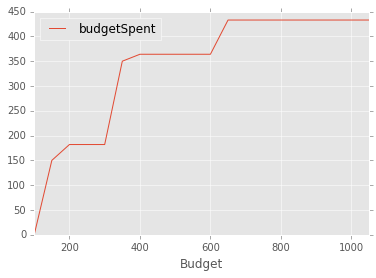

In [33]:
#display(what_pd.sort(columns = ['Budget'], ascending=True))
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

what_pd.plot(x='Budget', y='budgetSpent')

### Conclusion
For this dataset, the **maximum budget to be spent is around 630$**

## References
* [CPLEX Modeling for Python documentation](https://rawgit.com/IBMDecisionOptimization/docplex-doc/master/docs/index.html)
* [Decision Optimization on Cloud](https://developer.ibm.com/docloud/)
* Need help with DOcplex or to report a bug? Please go [here](https://developer.ibm.com/answers/smartspace/docloud).
* Contact us at dofeedback@wwpdl.vnet.ibm.com.